In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
sa = gs.service_account(filename="enhanced-victor-363219-68e4353f5f23.json")
sheet = sa.open("Untitled form (Responses)")
work_sheet = sheet.worksheet("Form Responses 1")
df = pd.DataFrame(work_sheet.get_all_records())
df.head()

,Timestamp,sessionID,a score,b score,gg time,who caused death,death reason
0,,,,,,,
1,,,,,,,
2,,,,,,,
3,,,,,,,
4,,,,,,,


In [3]:
df['gg time'] = pd.to_numeric(df['gg time'])
df['a score'] = pd.to_numeric(df['a score'])
df['b score'] = pd.to_numeric(df['b score'])
df=df[df['gg time'] <= 600]
df1 = df.dropna()
df1

,Timestamp,sessionID,a score,b score,gg time,who caused death,death reason
23,9/21/2022 4:49:24,637993325496660845,0.0,0.0,14.0,,
24,9/21/2022 4:53:44,637993328050186794,0.0,0.0,18.0,,
25,9/21/2022 4:54:08,637993328438416579,0.0,0.0,4.0,,
26,9/21/2022 4:55:31,637993329096890637,3.0,0.0,21.0,,
27,9/21/2022 5:03:50,637993334216644963,0.0,0.0,8.0,,
...,...,...,...,...,...,...,...
149,9/27/2022 16:51:03,637999000000000000.0,2.0,1.0,31.0,0,Fall
150,9/27/2022 16:53:06,637999000000000000.0,2.0,1.0,122.0,0,Touch Enemy
151,9/27/2022 16:54:24,637999000000000000.0,0.0,0.0,5.0,0,Touch different Color
152,9/27/2022 16:54:31,637999000000000000.0,0.0,0.0,4.0,1,Touch different Color


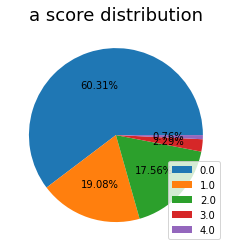

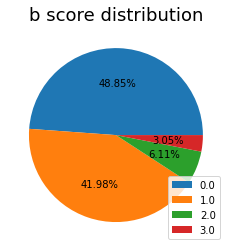

In [4]:
for i in (['a score', 'b score']):
    df2 = df1.groupby([i]).size()
    plt.title(i + " distribution",fontsize=18)
    patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
    plt.legend(patches, df2.index, loc="lower right")
    plt.show()

Text(0.5, 1.0, 'Survival Time for Each Player')

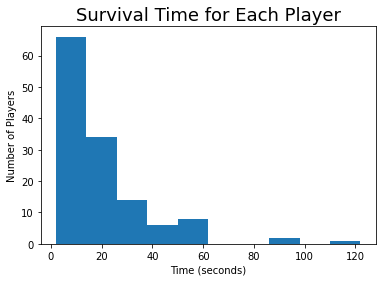

In [5]:
plt.hist(df1['gg time'])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Players")
plt.title("Survival Time for Each Player",fontsize=18)

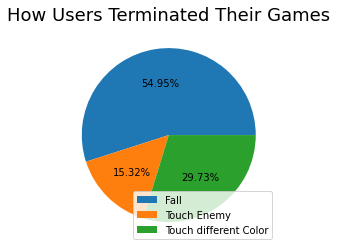

In [9]:
df3 = df1[df1['death reason'] != '']
df4 = df3.groupby(['death reason']).size()
plt.title("How Users Terminated Their Games",fontsize=18)
patches, text1, text2 = plt.pie(df4, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
plt.legend(patches, df4.index, loc="lower right")
plt.show()

C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


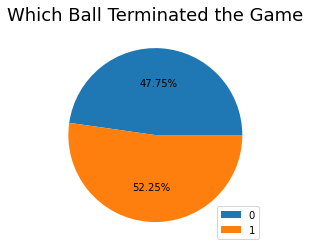

In [16]:
whoCausedDeath = df3['who caused death'].map({1: 'b ball', 0: 'a ball'})
df3["which ball caused death"] = whoCausedDeath
df5 = df3.groupby(['who caused death']).size()
plt.title("Which Ball Terminated the Game",fontsize=18)
patches, text1, text2 = plt.pie(df5, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
plt.legend(patches, df5.index, loc="lower right")
plt.show()